In [2]:
#import dataset ...

In [3]:
import numpy as np 
import pandas as pd 

In [4]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4936,ham,G wants to know where the fuck you are,NaN,NaN,NaN
4325,ham,That seems unnecessarily hostile,NaN,NaN,NaN
2092,ham,"Oh, my love, it's soooo good to hear from you....",NaN,NaN,NaN
2140,ham,After the drug she will be able to eat.,NaN,NaN,NaN
2040,ham,You always make things bigger than they are,NaN,NaN,NaN


In [6]:
#counting total dataset
df.shape 

(5572, 5)

In [7]:
#steps follow ->1.data cleaning 2.EDA 3Text preprocessing 3.modelbuilding 4.evaluation, 
#5.improvemenntabs 
#6.deploy 

##  DATA CLEANING

In [8]:
#checking data information..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop last 3 colmns 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
1452,ham,"That's good, because I need drugs"
4669,ham,"I didnt get ur full msg..sometext is missing, ..."
3027,ham,You have got tallent but you are wasting.
2047,ham,No de. But call me after some time. Ill tell y...
1394,ham,R we still meeting 4 dinner tonight?


In [11]:
#renaming columns v1 and v2 ...... v1= target, v2=text 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
3723,spam,"Hi there, 2nights ur lucky night! Uve been inv..."
1772,ham,Good afternoon sexy buns! How goes the job sea...
1878,ham,I AM AT A PARTY WITH ALEX NICHOLS
1605,ham,When you came to hostel.
4033,ham,Wot u up 2? Thout u were gonna call me!! Txt b...
5232,spam,YOU ARE CHOSEN TO RECEIVE A å£350 AWARD! Pls c...
5569,ham,"Pity, * was in mood for that. So...any other s..."
2733,ham,Do Ì_ noe if ben is going?
9,spam,Had your mobile 11 months or more? U R entitle...
650,ham,Thats cool! Sometimes slow and gentle. Sonetim...


In [12]:
#as in target -'ham' or 'spam' written so we need to change 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#assign ham==0, spam==1
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#checking missing value present or not... 
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate value 
df.duplicated().sum()

403

In [15]:
#remove duplicate value. .. 
df=df.drop_duplicates(keep='first')
#once chaking duplicate.. 
df.duplicated().sum()


0

In [16]:
df.shape

(5169, 2)

 ## 2. EDA (Exploratory Data Analysis)

In [17]:
#first explore how much ham ==0  and spam==1 present.. 
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

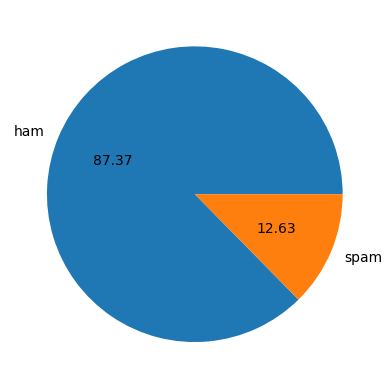

In [19]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()
#from pie chart 87% is true sms and 12% are spam ... so we can conclude that data is imbalanced

In [20]:
#data imbalanced 

In [21]:
#download natural language tool kit 
!pip install nltk


Defaulting to user installation because normal site-packages is not writeable


In [22]:
import sys
# This will show you the path of the Python executable your notebook is using
print(sys.executable)

C:\Users\bilas\AppData\Local\Programs\Python\Python311\python.exe


In [23]:
 !C:\Users\bilas\AppData\Local\Programs\Python\Python311\python.exe -m pip install nltk

In [24]:
!C:\Users\bilas\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [25]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bilas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bilas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
#create extra columns for count.. 
df['num_characters']=df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bilas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [29]:
#fetch num of words by nlt and creating another columns..
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
#fetch num of sentece by nlt and creating another columns..
#using sent_tokenize- it token the sentences.. 
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
#describe our columns...
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#giving output for ham messages 
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#giving output for spam messages 
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
#plot spam and ham .... 
import seaborn as sns 


<Axes: xlabel='num_characters', ylabel='Count'>

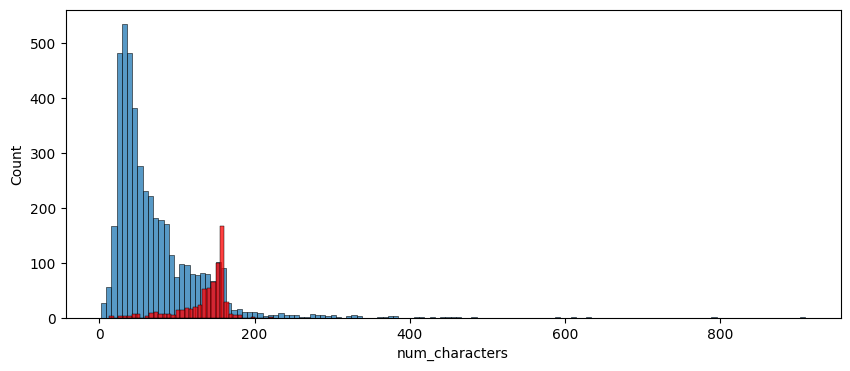

In [35]:
#in figure for num_characters
plt.figure(figsize=(10,4))
#ham
sns.histplot(df[df['target']==0]['num_characters'])
#spam 
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

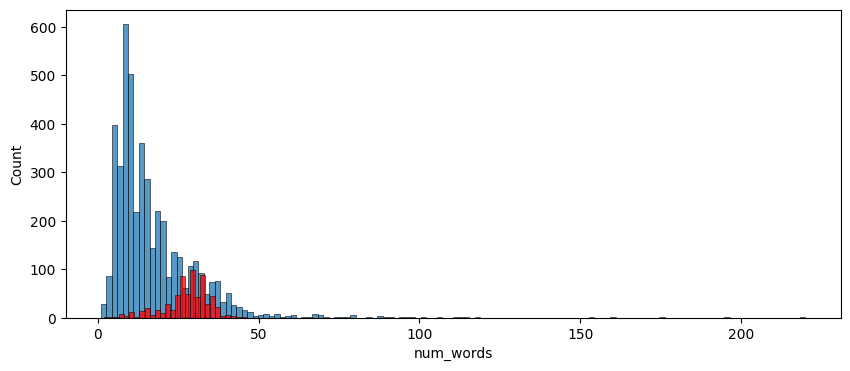

In [36]:
#in figure for num_words
plt.figure(figsize=(10,4))
#ham
sns.histplot(df[df['target']==0]['num_words'])
#spam 
sns.histplot(df[df['target']==1]['num_words'],color='red')



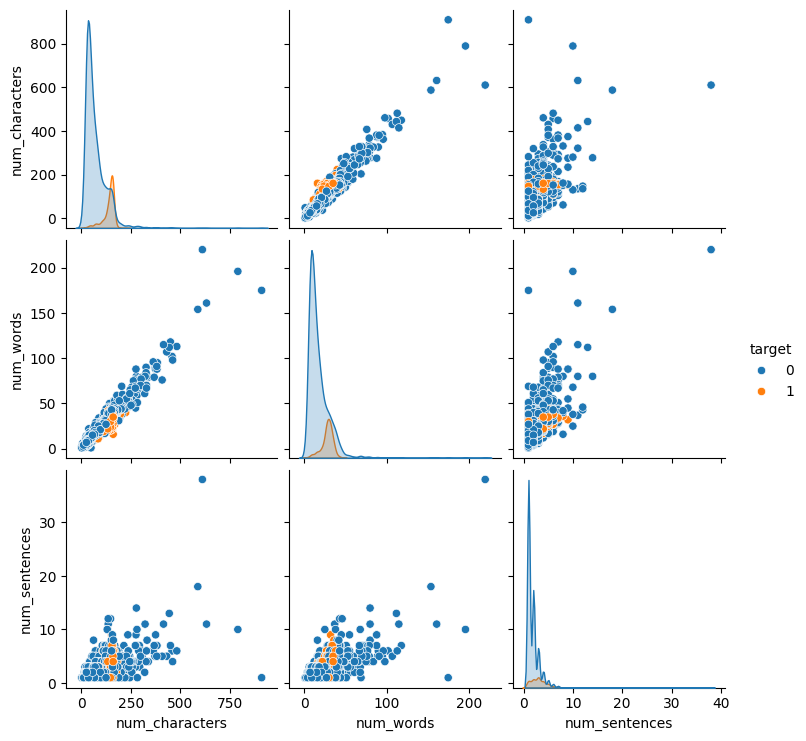

In [37]:
#relation btw columns... 
sns.pairplot(df,hue='target')

<Axes: >

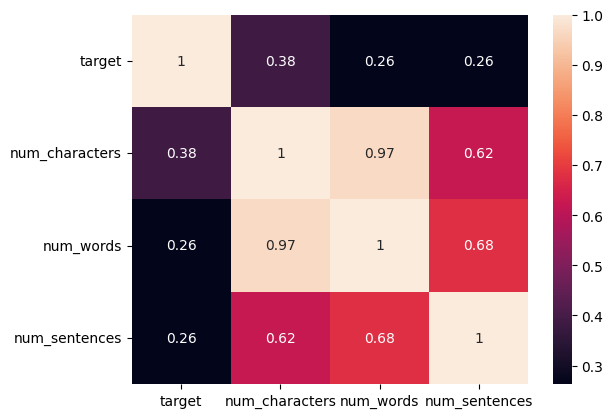

In [38]:
#coorelation.. 
sns.heatmap(df.corr(numeric_only=True),annot=True)

 *** DATA PROCESSING....(TEXT PROCESSING)
1.LOWER CASE - 
2. TOKENIZATION - 
3.REMOVING SPECIAL CHARACTERS, STOP WORDS AND PUNCTUATION - 4.STEMMING(converting same meaning word into single meaning) ***

In [39]:

def transform_text(text): 
    text=text.lower() #LOWER CASE CONVERSION 
    text=nltk.word_tokenize(text) #TOKENIZATION

    #REMOVING SPECIAL CHARACTERS 
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    return y

transform_text("hii takdghRTYY % GHVH &SGDFJSH # - jkk ! DSG")

['hii', 'takdghrtyy', 'ghvh', 'sgdfjsh', 'jkk', 'dsg']

In [40]:
 #stopwords (no meaning in sentence, working as sentence formation)
from nltk.corpus import stopwords
stopwords.words('english')


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [41]:
#to find punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
def transform_text(text): 
    text=text.lower() #LOWER CASE CONVERSION 
    text=nltk.word_tokenize(text) #TOKENIZATION

    #REMOVING SPECIAL CHARACTERS 
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text= y[:] #cloning 
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return y

transform_text("hii are a an did % GHVH &SGDFJSH # present - jkk ! DSG?")

['hii', 'ghvh', 'sgdfjsh', 'present', 'jkk', 'dsg']

In [43]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('helping')

'help'

In [44]:
def transform_text(text): 
    text=text.lower() #LOWER CASE CONVERSION 
    text=nltk.word_tokenize(text) #TOKENIZATION

    #REMOVING SPECIAL CHARACTERS 
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text= y[:] #cloning 
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

transform_text("hii are a an did % GHVH &SGDFJSH # present - jkk ! DSG?")

'hii ghvh sgdfjsh present jkk dsg'

In [45]:
transform_text("I loved^ to watch a yt video ON machine LearniG: what about? you$ #")

'watch yt video machin learnig'

In [46]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [47]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [48]:
#apply of data.... 
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [49]:
df['transformed_text']=df['text'].apply(transform_text)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


WORD CLOUD GENERATION(PICTURE MADE UP WORDS WHARE - the size of each word shows how frequently it appears in the dataset)

In [51]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


In [52]:
import sys
print(sys.executable)


C:\Users\bilas\AppData\Local\Programs\Python\Python311\python.exe


In [53]:
import sys
!{sys.executable} -m pip install wordcloud


In [54]:
from wordcloud import WordCloud
wc=WordCloud(width=800,height=650,min_font_size=10,background_color='white')

In [55]:
print(df.columns)


Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')


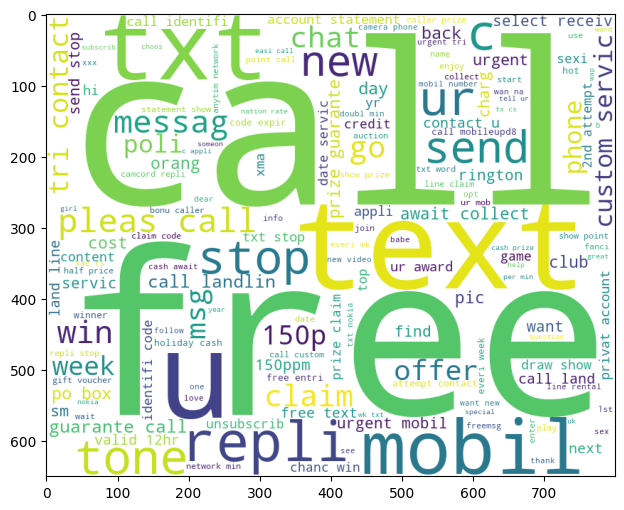

In [56]:
#spam row collecting
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(18,6))
plt.imshow(spam_wc)

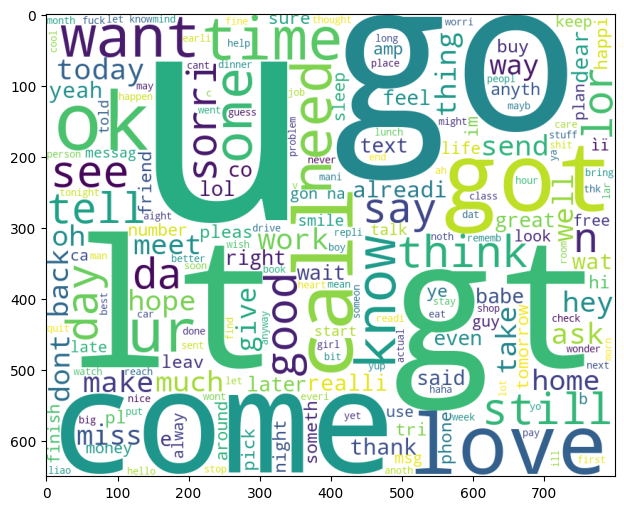

In [57]:
#Ham row collecting
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(18,6))
plt.imshow(ham_wc)

In [58]:
#top 30 or 50 word finding from ham and spam 

In [59]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
     for word in msg.split():
         spam_corpus.append(word)

# print(spam_corpus)
len(spam_corpus)


9939

In [60]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\bilas\AppData\Local\Temp\ipykernel_4536\4090532630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="word", y="count", data=top_spam,palette="viridis")


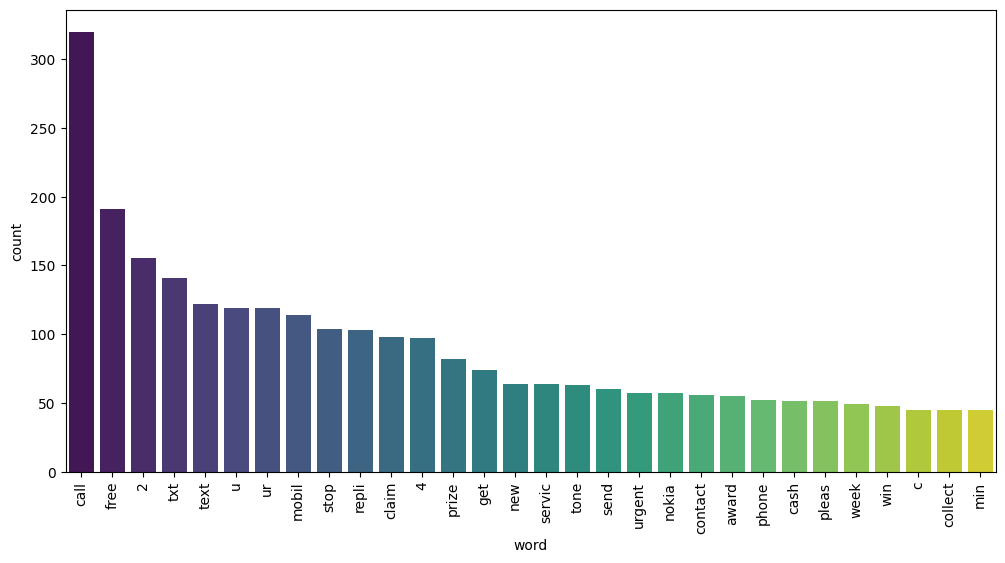

In [61]:
top_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))
top_spam.columns = ["word", "count"]

plt.figure(figsize=(12,6))
sns.barplot(x="word", y="count", data=top_spam,palette="viridis")
plt.xticks(rotation=90)
plt.show()

In [62]:
#For ham...
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
     for word in msg.split():
         ham_corpus.append(word)

# print(spam_corpus)
len(ham_corpus)

35404

In [63]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\bilas\AppData\Local\Temp\ipykernel_4536\1092861106.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="word", y="count", data=top_ham,palette="viridis")


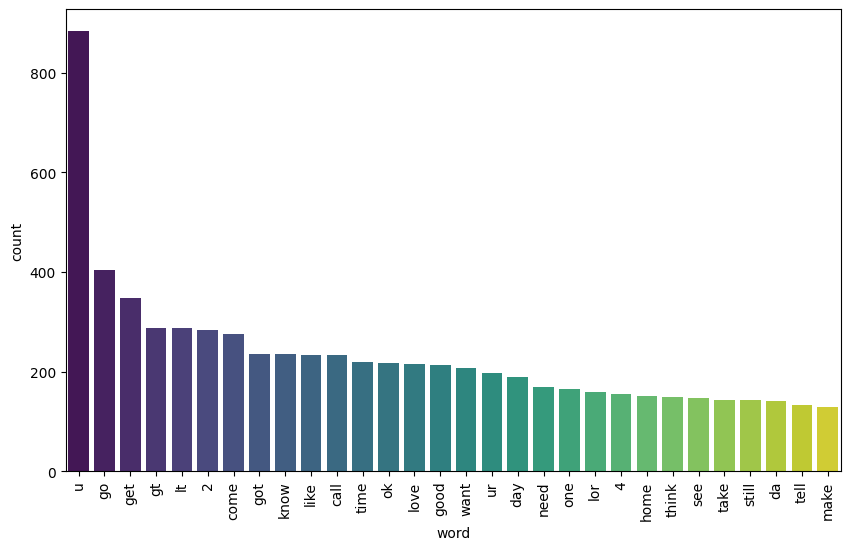

In [64]:
top_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
top_ham.columns = ["word", "count"]

plt.figure(figsize=(10,6))
sns.barplot(x="word", y="count", data=top_ham,palette="viridis")
plt.xticks(rotation=90)
plt.show()

**MODEL BUILDING**

In [65]:
#countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [66]:
x=cv.fit_transform(df['transformed_text']).toarray()
x.shape
#scaling not improveing 
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# x=scaler.fit_transform(x)

(5169, 6708)

In [67]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [69]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [70]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [71]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [72]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [73]:
#TF-IDF.....
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
x_tf=tfidf.fit_transform(df['transformed_text']).toarray()
x_tf.shape
y=df['target'].values
y

x_train,x_test,y_train,y_test=train_test_split(x_tf,y,test_size=0.2,random_state=2)


In [74]:
#TF-IDF.....
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [75]:
#TF-IDF.....best precision getting....
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [76]:
#TF-IDF.....
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [77]:
#choosing TF_IDF with mnb.....

TESTING OTHERS MACHINE LEARNING MODELS

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [99]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=100,algorithm="SAMME",random_state=42)


In [100]:
#ceating dictionary ...
clfs={
    'SVC':svc,
    'KN':knc ,
    'NB':mnb ,
    'DT':dtc ,
    'LR':lrc ,
    'RF':rfc ,
    'AdaBoost':abc ,
}

In [101]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [102]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [103]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9332688588007737
Precision -  0.8709677419354839


In [104]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [105]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
4,LR,0.958414,0.970297
6,AdaBoost,0.933269,0.870968
3,DT,0.927466,0.811881


In [106]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [107]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.958414
5,AdaBoost,Accuracy,0.933269
6,DT,Accuracy,0.927466
7,KN,Precision,1.000000
8,NB,Precision,1.000000
9,RF,Precision,0.982906


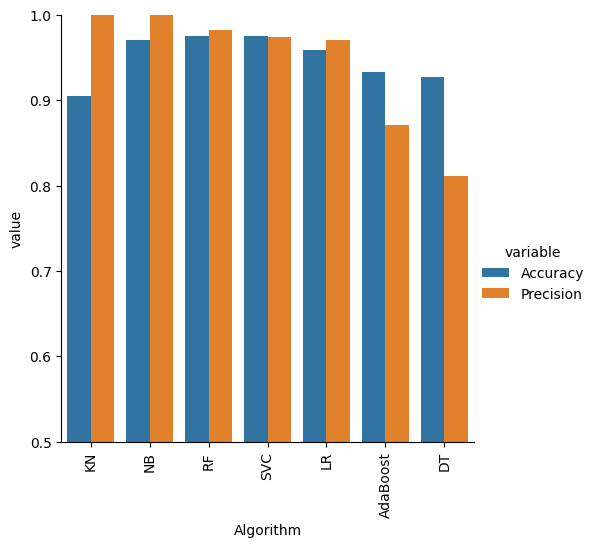

In [108]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [109]:
#improving model..... 
#1. change the max_feature of TF-IDf

In [110]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [111]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [112]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [113]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [114]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [115]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
5,AdaBoost,0.933269,0.870968,0.933269,0.870968,0.933269,0.870968,0.933269,0.870968
6,DT,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881


In [116]:
#goal is to make precision 100% accurate..means 1 ..  

In [117]:
#Voting clssifier... 
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [118]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [119]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [120]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [121]:
#Stacking...
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [122]:
from sklearn.ensemble import StackingClassifier

In [123]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [124]:
# clf.fit(x_train,y_train)
# y_pred = clf.predict(x_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [125]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

**Add a BERT / DistilBERT-based Classifier**

In [126]:
# !pip install transformers torch datasets


In [127]:
# import pandas as pd
# from datasets import Dataset

# df_bert = df[['text', 'target']].copy()

# dataset = Dataset.from_pandas(df_bert)


In [128]:
# #Load tokenizer & tokenize text
# from transformers import AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# def preprocess(batch):
#     return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=128)

# tokenized_dataset = dataset.map(preprocess, batched=True)


In [130]:
# tokenized_dataset = tokenized_dataset.train_test_split(test_size=0.2, seed=2)


In [131]:
# #Load DistilBERT Model 
# from transformers import AutoModelForSequenceClassification

# model = AutoModelForSequenceClassification.from_pretrained(
#     "distilbert-base-uncased",
#     num_labels=2
# )


In [132]:
# pip install transformers[torch]


In [133]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# model_name = "bert-base-uncased"

# tokenizer = AutoTokenizer.from_pretrained(model_name)


In [134]:
# model = AutoModelForSequenceClassification.from_pretrained(
#     model_name,
#     num_labels=2
# )


In [135]:
# from datasets import load_dataset

# # Load CSV with latin-1 encoding
# raw_dataset = load_dataset(
#     "csv",
#     data_files="spam.csv",
#     encoding="latin-1"
# )
# raw_dataset = raw_dataset["train"]

# # Rename columns
# raw_dataset = raw_dataset.rename_column("v1", "label")
# raw_dataset = raw_dataset.rename_column("v2", "text")

# # Convert labels to numeric
# def encode_label(example):
#     example["label"] = 1 if example["label"] == "spam" else 0
#     return example

# raw_dataset = raw_dataset.map(encode_label)

# # Train/test split
# raw_dataset = raw_dataset.train_test_split(test_size=0.2, seed=2)


In [136]:
# def tokenize_fn(batch):
#     return tokenizer(
#         batch["text"],
#         padding="max_length",
#         truncation=True,
#         max_length=64
#     )

# tokenized_dataset = raw_dataset.map(tokenize_fn, batched=True)


In [137]:
# # Set format for PyTorch
# tokenized_dataset.set_format(
#     type="torch",
#     columns=["input_ids", "attention_mask", "label"]
# )

In [138]:
# from transformers import TrainingArguments, Trainer

# training_args = TrainingArguments(
#     output_dir="./bert_model",
#     eval_strategy="epoch",
#     save_strategy="epoch",          
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=16,
#     num_train_epochs=1,
#     logging_steps=50,
#     load_best_model_at_end=True,
# )

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_dataset["train"],
#     eval_dataset=tokenized_dataset["test"]
# )

# trainer.train()


In [139]:
# metrics = trainer.evaluate()
# print(metrics)

In [140]:
# import torch

# def predict_sms(text):
#     inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
#     outputs = model(**inputs)
#     probs = torch.nn.functional.softmax(outputs.logits, dim=1)
#     pred = torch.argmax(probs).item()
#     return "SPAM" if pred == 1 else "HAM"



In [141]:
# print(predict_sms("India have won it twice in 2007 and 2024 while also finishing as runners-up in 2014. "))


In [142]:
# model.save_pretrained("bert_model")
# tokenizer.save_pretrained("bert_tokenizer")
